In [1]:

# Importação de bibliotecas necessárias
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
try:
    df = pd.read_csv('../datasets/spam.csv', encoding='Windows-1252')
    display(df.head())
except Exception as e:
    print(f"Erro ao carregar o dataset: {e}")

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN



### Limpeza e Renomeação de Colunas
Removemos as colunas que não têm utilidade para a análise e renomeamos para tornar as colunas mais descritivas.


In [3]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)
df.columns = ['Label', 'Message']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Label    5572 non-null   object
 1   Message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB



### Análise da Distribuição dos Rótulos
Aqui verificamos se o dataset está balanceado em termos de e-mails classificados como 'spam' e 'ham'.


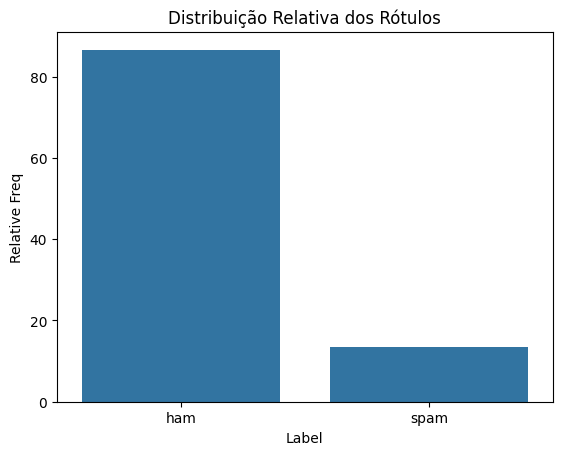

In [4]:
# Distribuição dos rótulos
freq = df['Label'].value_counts()
freq_df = freq.reset_index()
freq_df.columns = ['Label', 'count']
freq_df['Relative Freq'] = round(freq_df['count'] / freq_df['count'].sum() * 100, 2)

# Gráfico de barras da distribuição dos rótulos
sns.barplot(x=freq_df['Label'], y=freq_df['Relative Freq'])
plt.title('Distribuição Relativa dos Rótulos')
plt.show()


### Pré-processamento e Tokenização
Transformamos as mensagens em vetores de contagem para que possam ser usadas pelo modelo. O `CountVectorizer` converte o texto em uma matriz esparsa com a frequência de cada palavra.


In [5]:
vectorizer = CountVectorizer()
X_counts = vectorizer.fit_transform(df['Message'])
y = df['Label'].map({'spam': 1, 'ham': 0})

X_train, X_test, y_train, y_test = train_test_split(X_counts, y, test_size=0.2, random_state=42)


### Treinamento e Avaliação do Modelo
Utilizamos o `MultinomialNB`, um modelo Naive Bayes adequado para classificação de texto. Aqui também calculamos métricas como Acurácia, Precisão, Recall e F1-Score.


In [6]:
modelo = MultinomialNB()
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)

# Cálculo das métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Acurácia: {accuracy:.2f}')
print(f'Precisão: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')


Acurácia: 0.98
Precisão: 0.91
Recall: 0.93
F1-Score: 0.92



### Matriz de Confusão
A matriz de confusão nos dá uma visão detalhada das previsões corretas e incorretas do modelo.


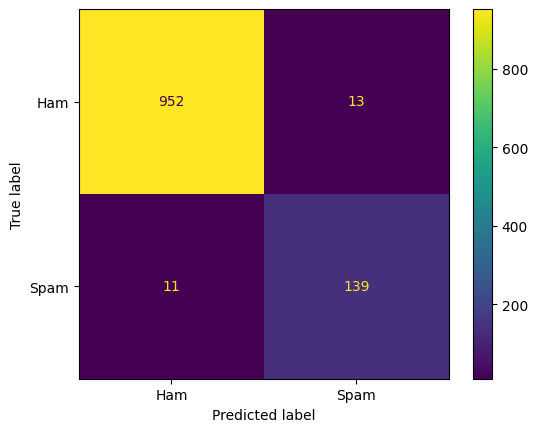

In [7]:

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=['Ham', 'Spam']).plot()
plt.show()



### Validação Cruzada
Podemos utilizar **K-Fold Cross-Validation** para garantir que o modelo tenha uma avaliação mais robusta.


In [8]:

scores = cross_val_score(modelo, X_counts, y, cv=5)
print(f"Acurácia média com Cross-Validation: {scores.mean():.2f}")


Acurácia média com Cross-Validation: 0.98
